# UnitedStates_COVID_19_dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid=pd.read_csv('UnitedStates_COVID_19.csv',parse_dates=['Last_Update'])
covid

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


# Exploratory Data Analysis

In [3]:
covid.shape

(58, 18)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null datetime64[ns]
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     33 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(3)
memory usage: 8.3+ KB


In [5]:
covid.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [6]:
 covid.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [7]:
covid.Country_Region.value_counts()

US    58
Name: Country_Region, dtype: int64

In [8]:
covid.Last_Update.value_counts()

2020-05-21 02:32:54    58
Name: Last_Update, dtype: int64

In [9]:
covid.ISO3.value_counts()

USA    53
MNP     1
PRI     1
VIR     1
ASM     1
GUM     1
Name: ISO3, dtype: int64

Filling the Null Values

In [10]:
list1=['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
from sklearn.impute import SimpleImputer
sc=SimpleImputer(strategy='mean')
for i in list1:
    covid[i]=sc.fit_transform(covid[i].values.reshape(-1,1))

In [11]:
covid.isna().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [12]:
covid

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,US,2020-05-21 02:32:54,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,US,2020-05-21 02:32:54,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,USA,3894.186870,14.342541


The dataset  is provided to identify the deaths and recovered cases in USA.

In [13]:
#uni and bivariate analysis

In [14]:
covid.Province_State.value_counts()

Puerto Rico                 1
Virginia                    1
Diamond Princess            1
Wyoming                     1
Colorado                    1
New York                    1
Utah                        1
Wisconsin                   1
Oklahoma                    1
Texas                       1
Oregon                      1
American Samoa              1
Pennsylvania                1
Illinois                    1
Massachusetts               1
Connecticut                 1
Alaska                      1
Georgia                     1
Michigan                    1
West Virginia               1
Idaho                       1
New Mexico                  1
Alabama                     1
New Hampshire               1
Indiana                     1
Mississippi                 1
California                  1
Kentucky                    1
Vermont                     1
Missouri                    1
Guam                        1
Florida                     1
Nevada                      1
South Caro

In [15]:
#The Data is collected from 58 provinces of USA.

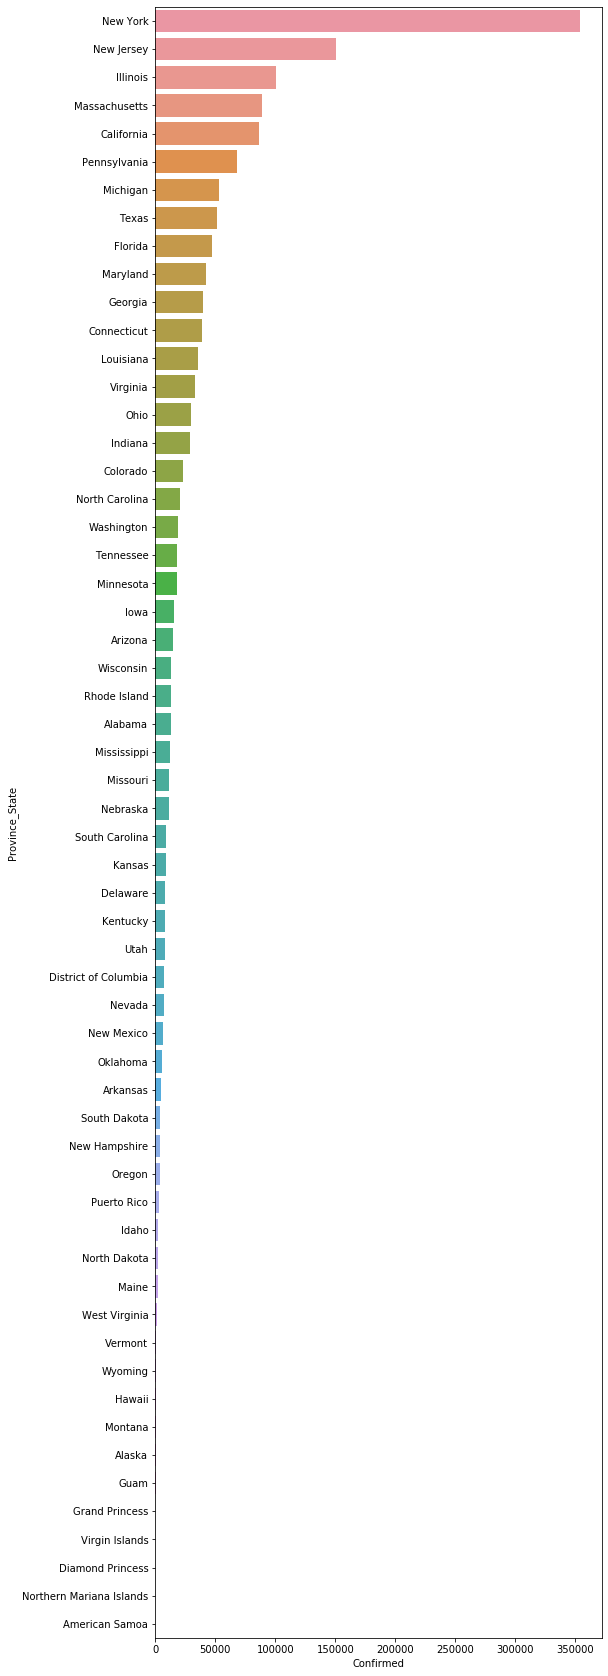

In [16]:
da=covid.sort_values(by='Confirmed',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Confirmed',y='Province_State',data=da)

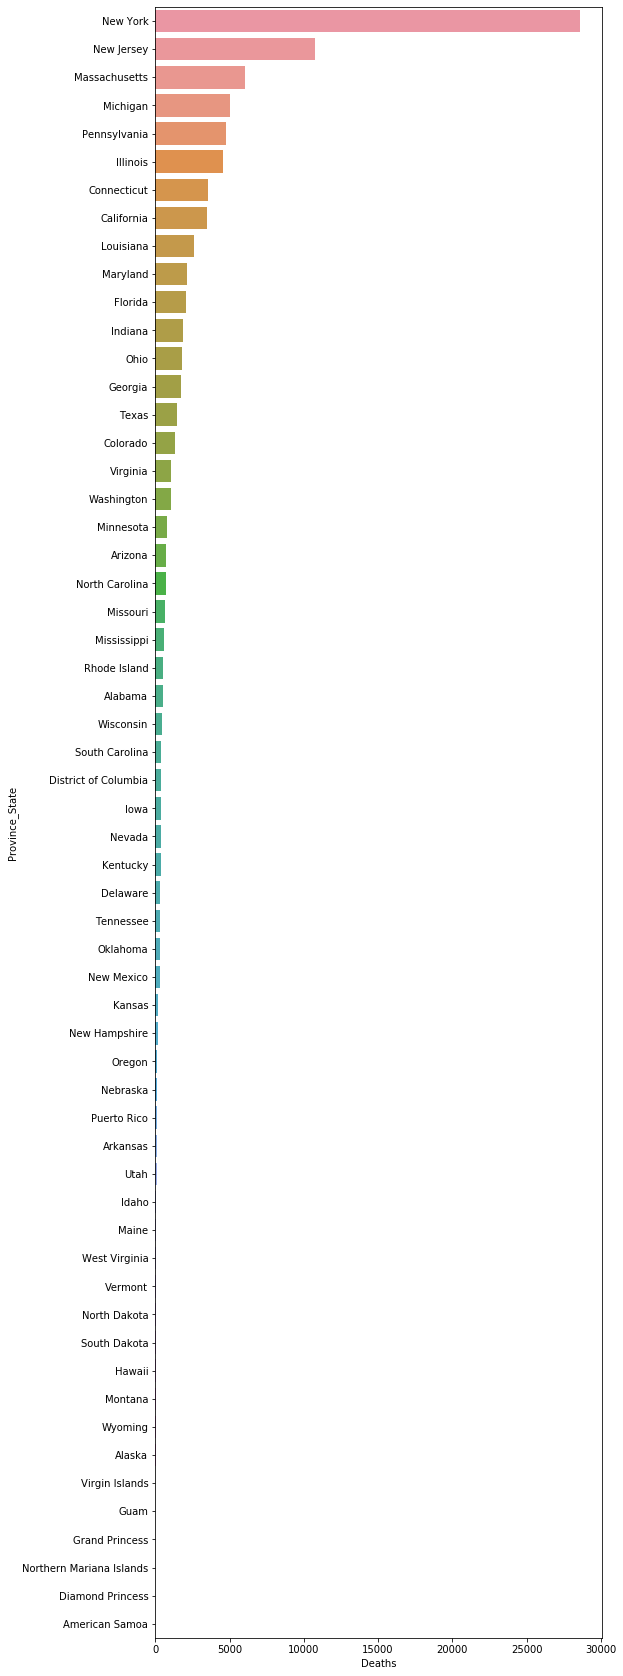

In [17]:
#Deaths
da=covid.sort_values(by='Deaths',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Deaths',y='Province_State',data=da)

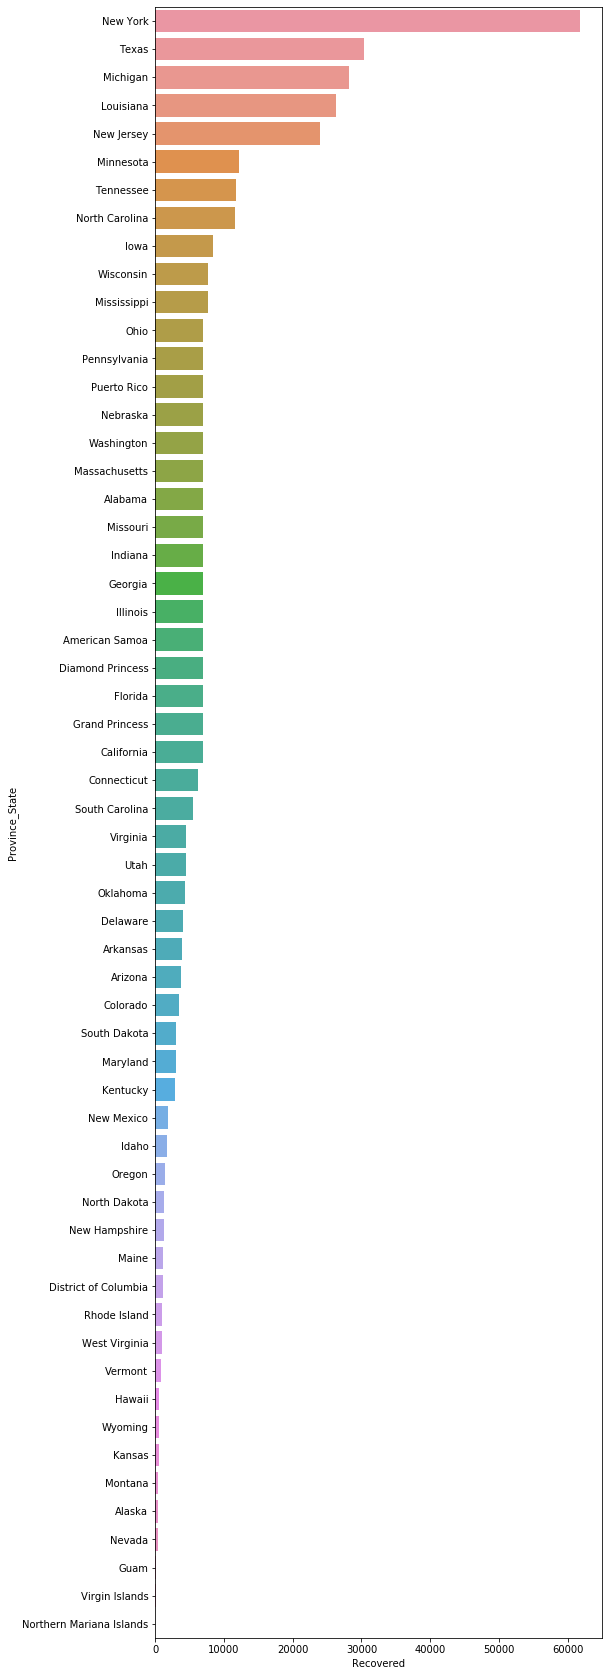

In [18]:
#Recovered
da=covid.sort_values(by='Recovered',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Recovered',y='Province_State',data=da)

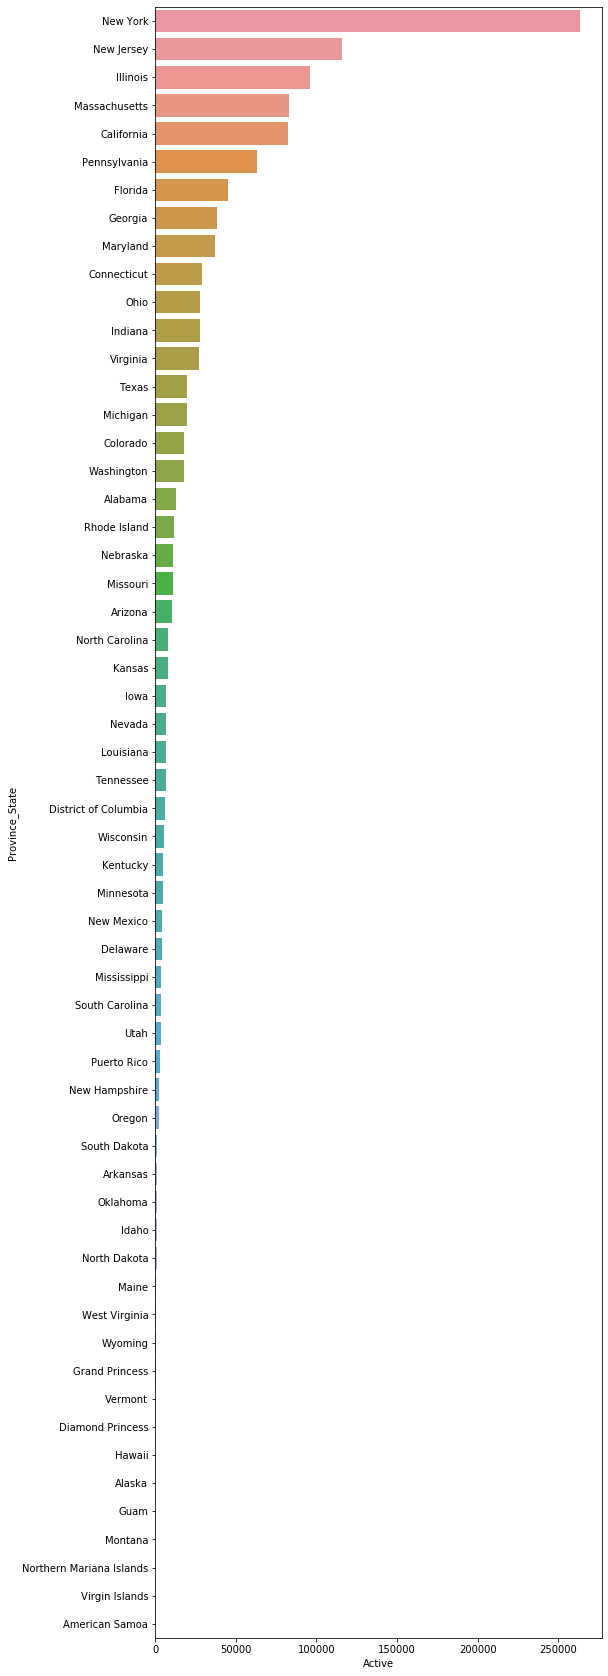

In [19]:
da=covid.sort_values(by='Active',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Active',y='Province_State',data=da)

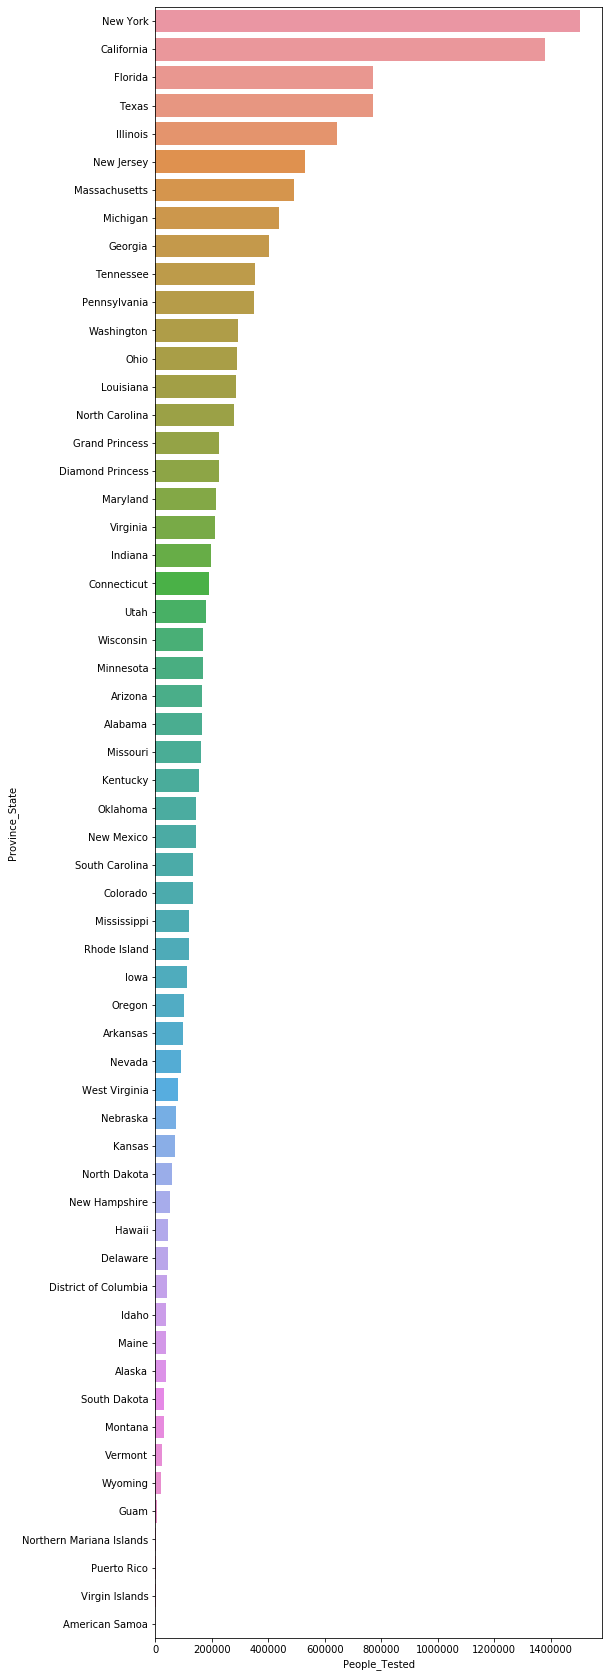

In [20]:
#People_Tested
da=covid.sort_values(by='People_Tested',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='People_Tested',y='Province_State',data=da)

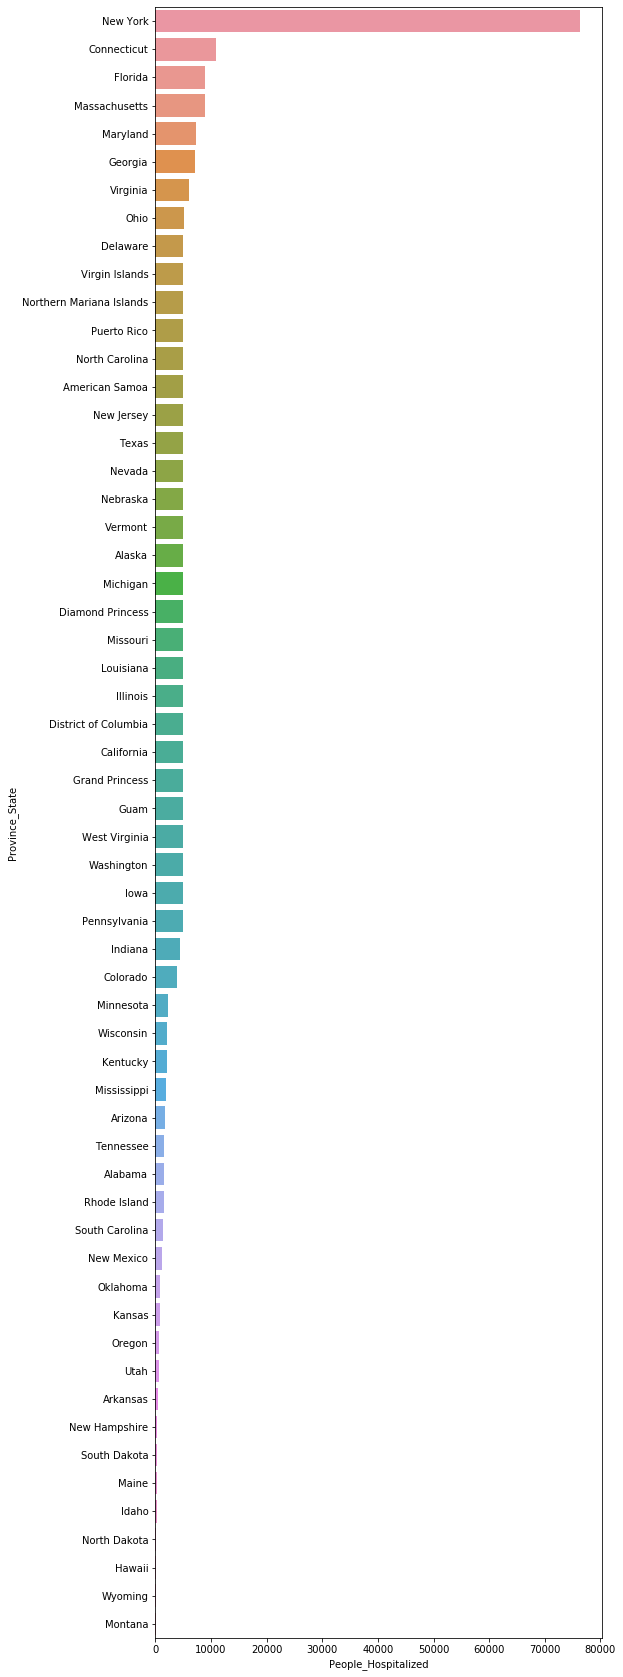

In [21]:
#People_Hospitalized
da=covid.sort_values(by='People_Hospitalized',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='People_Hospitalized',y='Province_State',data=da)

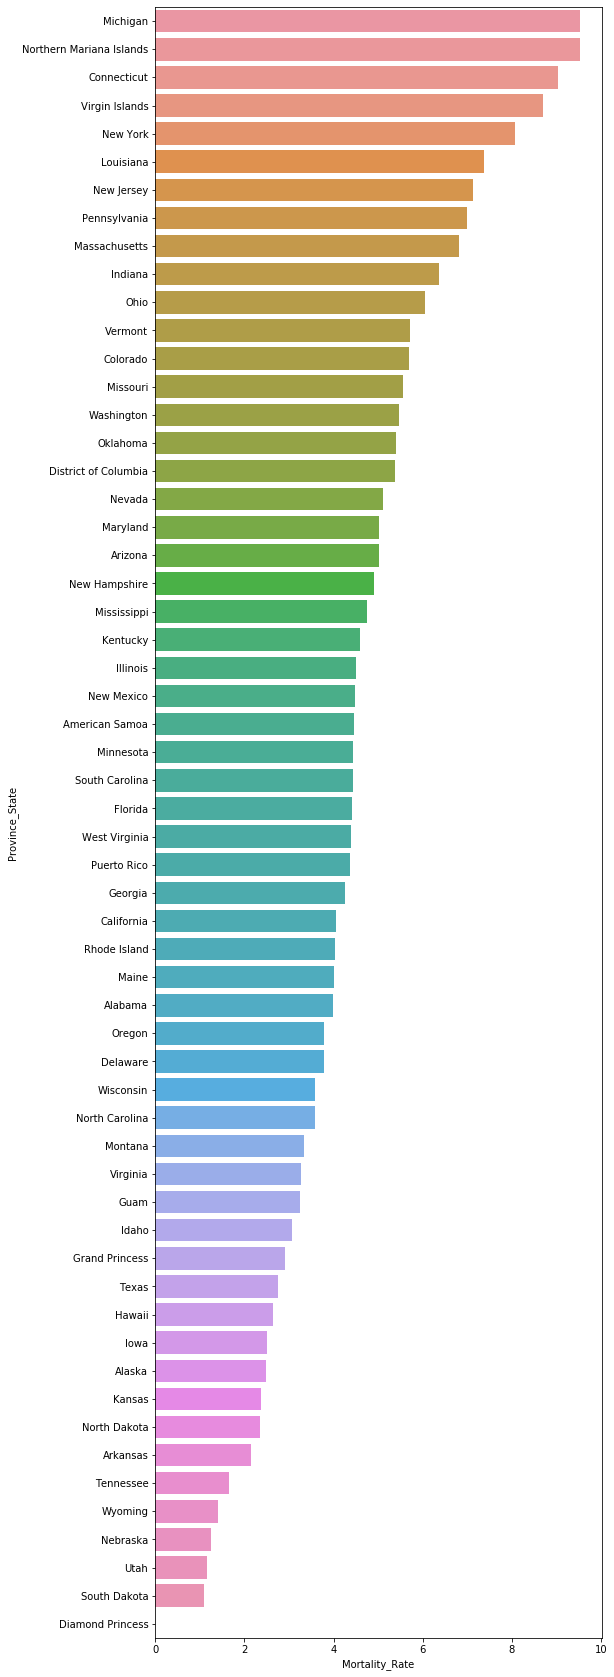

In [22]:
#Mortality_Rate
da=covid.sort_values(by='Mortality_Rate',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Mortality_Rate',y='Province_State',data=da)

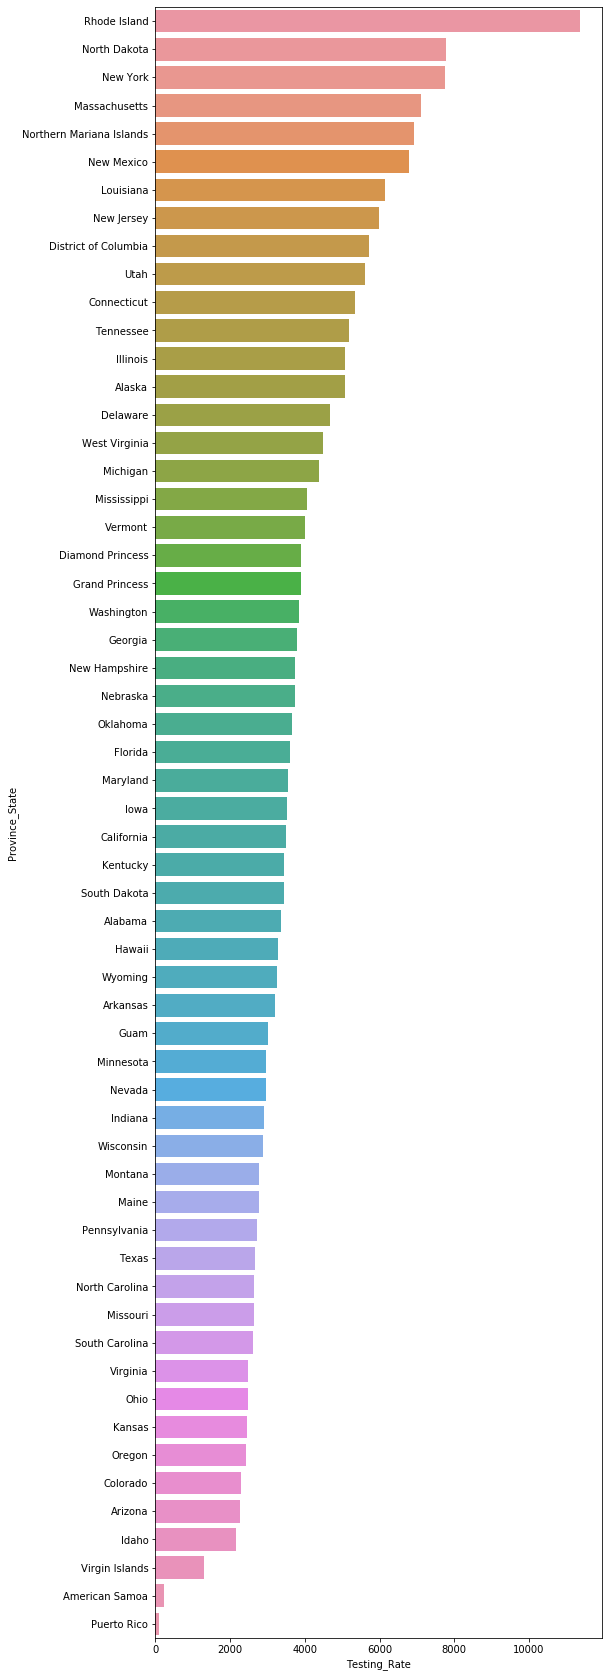

In [23]:
#Testing_Rate
da=covid.sort_values(by='Testing_Rate',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='Testing_Rate',y='Province_State',data=da)

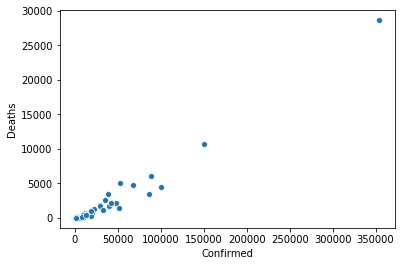

In [24]:
sns.scatterplot(x='Confirmed',y='Deaths',data=covid)

In [25]:
#With Increase in Confirmed cases Deaths increases.

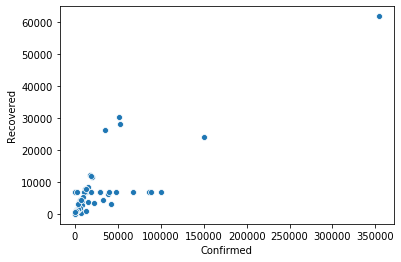

In [26]:
sns.scatterplot(x='Confirmed',y='Recovered',data=covid)

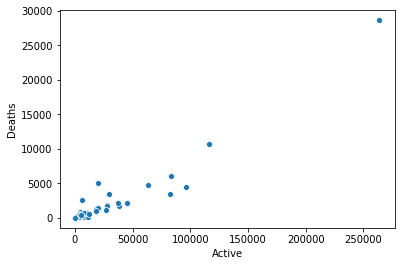

In [27]:
sns.scatterplot(x='Active',y='Deaths',data=covid)

In [28]:
#More Active case refer more Deaths

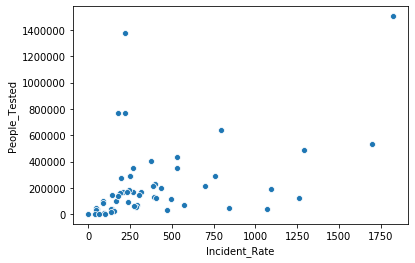

In [29]:
sns.scatterplot(x='Incident_Rate',y='People_Tested',data=covid)

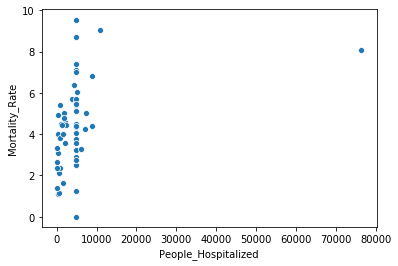

In [30]:
sns.scatterplot(x='People_Hospitalized',y='Mortality_Rate',data=covid)

In [31]:
#People_Hospitalized affects mortaality very less.

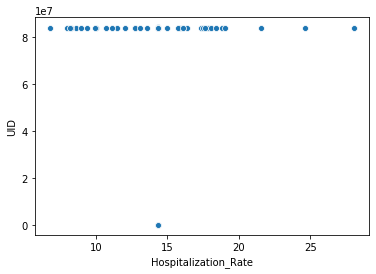

In [32]:
sns.scatterplot(x='Hospitalization_Rate',y='UID',data=covid)

In [33]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null datetime64[ns]
Lat                     58 non-null float64
Long_                   58 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               58 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           58 non-null float64
People_Tested           58 non-null float64
People_Hospitalized     58 non-null float64
Mortality_Rate          58 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            58 non-null float64
Hospitalization_Rate    58 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(3)
memory usage: 8.3+ KB


In [34]:
#Dropping redundant columns
Data=covid.drop(['Country_Region','Last_Update','People_Hospitalized','UID','Hospitalization_Rate','ISO3'],axis=1)
Data

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,Alabama,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,3.999387,3353.942386
1,Alaska,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,2.493766,5063.940017
2,American Samoa,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4.458248,222.857246
3,Arizona,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,5.011405,2272.859351
4,Arkansas,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,2.138717,3189.670370
5,California,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4.066421,3492.893832
6,Colorado,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,5.698118,2289.339188
7,Connecticut,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,9.044775,5349.302875
8,Delaware,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,3.783256,4663.552976
9,Diamond Princess,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,0.000000,3894.186870


# Checking for Correlation

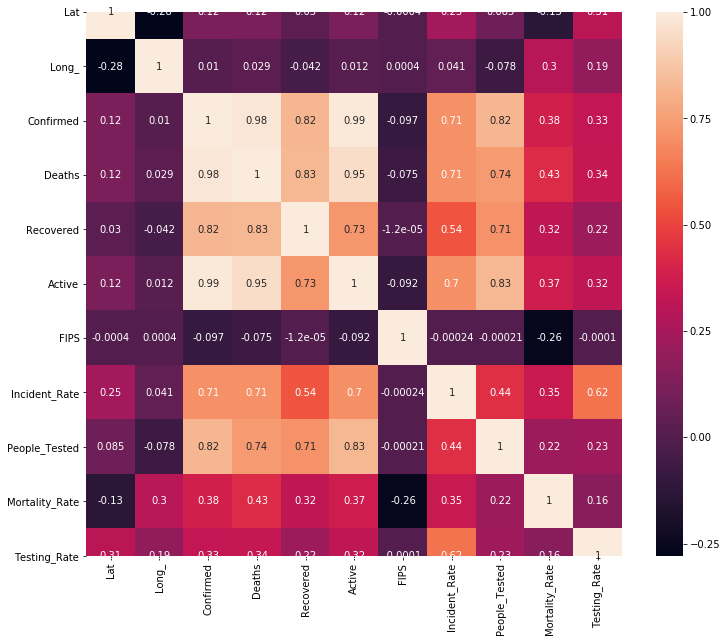

In [35]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

In [36]:
Data=Data.drop('FIPS',axis=1)
Data

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,Alabama,32.318200,-86.902300,13052,522,7007.428571,12530.0,266.194321,1.644500e+05,3.999387,3353.942386
1,Alaska,61.370700,-152.404400,401,10,352.000000,39.0,54.815493,3.704500e+04,2.493766,5063.940017
2,American Samoa,-14.271000,-170.132000,0,0,7007.428571,0.0,0.000000,1.240000e+02,4.458248,222.857246
3,Arizona,33.729800,-111.431200,14906,747,3773.000000,10386.0,204.788838,1.654350e+05,5.011405,2272.859351
4,Arkansas,34.969700,-92.373100,5003,107,3852.000000,1044.0,165.782801,9.625800e+04,2.138717,3189.670370
5,California,36.116200,-119.681600,85997,3497,7007.428571,82500.0,217.646575,1.380120e+06,4.066421,3492.893832
6,Colorado,39.059800,-105.311100,22797,1299,3478.000000,18020.0,395.868121,1.318370e+05,5.698118,2289.339188
7,Connecticut,41.597800,-72.755400,39017,3529,6264.000000,29224.0,1094.357902,1.907180e+05,9.044775,5349.302875
8,Delaware,39.318500,-75.507100,8194,310,3965.000000,3919.0,841.476990,4.541200e+04,3.783256,4663.552976
9,Diamond Princess,36.840089,-85.206614,49,0,7007.428571,49.0,396.230806,2.258534e+05,0.000000,3894.186870


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data.Province_State=le.fit_transform(Data.Province_State)
Data

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0,32.318200,-86.902300,13052,522,7007.428571,12530.0,266.194321,1.644500e+05,3.999387,3353.942386
1,1,61.370700,-152.404400,401,10,352.000000,39.0,54.815493,3.704500e+04,2.493766,5063.940017
2,2,-14.271000,-170.132000,0,0,7007.428571,0.0,0.000000,1.240000e+02,4.458248,222.857246
3,3,33.729800,-111.431200,14906,747,3773.000000,10386.0,204.788838,1.654350e+05,5.011405,2272.859351
4,4,34.969700,-92.373100,5003,107,3852.000000,1044.0,165.782801,9.625800e+04,2.138717,3189.670370
5,5,36.116200,-119.681600,85997,3497,7007.428571,82500.0,217.646575,1.380120e+06,4.066421,3492.893832
6,6,39.059800,-105.311100,22797,1299,3478.000000,18020.0,395.868121,1.318370e+05,5.698118,2289.339188
7,7,41.597800,-72.755400,39017,3529,6264.000000,29224.0,1094.357902,1.907180e+05,9.044775,5349.302875
8,8,39.318500,-75.507100,8194,310,3965.000000,3919.0,841.476990,4.541200e+04,3.783256,4663.552976
9,9,36.840089,-85.206614,49,0,7007.428571,49.0,396.230806,2.258534e+05,0.000000,3894.186870


Checking for Outlier

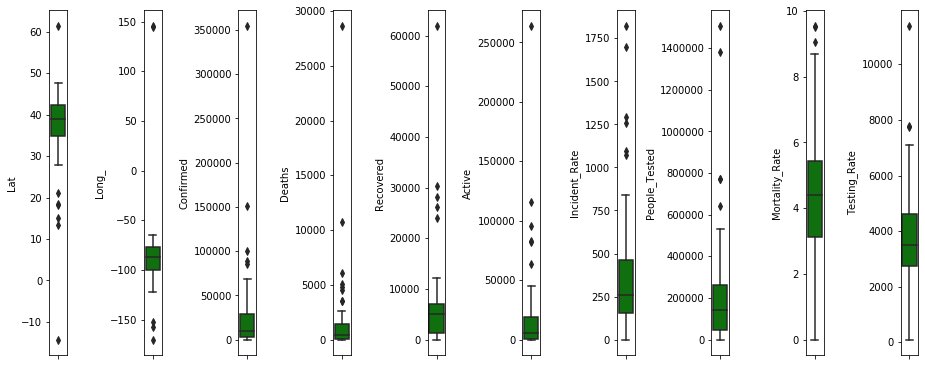

In [38]:
collist=Data.columns.values
ncol=15
nrows=12
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(ncol,nrows,i+1)
    sns.boxplot(Data[collist[i]],color='green',orient='v')
    plt.tight_layout()

Removing Outliers

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.70244092e+00, 4.26523477e-01, 3.49982309e-02, 2.62999251e-01,
        2.68934023e-01, 0.00000000e+00, 1.84202386e-01, 3.31615693e-01,
        2.11041917e-01, 2.18727182e-01, 2.86980973e-01],
       [1.64270615e+00, 2.31382962e+00, 1.38693367e+00, 5.05788407e-01,
        3.95372994e-01, 6.78047590e-01, 4.89328519e-01, 8.70668532e-01,
        6.48929571e-01, 9.36418161e-01, 6.21379592e-01],
       [1.58297138e+00, 4.82101134e+00, 1.75282379e+00, 5.13484119e-01,
        3.97842505e-01, 0.00000000e+00, 4.90281199e-01, 1.01045759e+00,
        7.75826083e-01, 0.00000000e+00, 1.95023139e+00],
       [1.52323661e+00, 2.93375472e-01, 5.41264279e-01, 2.27418578e-01,
        2.13370022e-01, 3.29519951e-01, 2.36575329e-01, 4.88210372e-01,
        2.07656498e-01, 2.63675605e-01, 8.61258492e-01],
       [1.46350184e+00, 1.76422927e-01, 1.47913213e-01, 4.17470037e-01,
        3.71418736e-01, 3.21471520e-01, 4.64778702e-01, 5.87682563e-01,
        4.45416038e-01, 1.10566079e+00, 3.74243212e-

In [40]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0,32.318200,-86.902300,13052,522,7007.428571,12530.0,266.194321,164450.000000,3.999387,3353.942386
1,1,61.370700,-152.404400,401,10,352.000000,39.0,54.815493,37045.000000,2.493766,5063.940017
3,3,33.729800,-111.431200,14906,747,3773.000000,10386.0,204.788838,165435.000000,5.011405,2272.859351
4,4,34.969700,-92.373100,5003,107,3852.000000,1044.0,165.782801,96258.000000,2.138717,3189.670370
6,6,39.059800,-105.311100,22797,1299,3478.000000,18020.0,395.868121,131837.000000,5.698118,2289.339188
7,7,41.597800,-72.755400,39017,3529,6264.000000,29224.0,1094.357902,190718.000000,9.044775,5349.302875
8,8,39.318500,-75.507100,8194,310,3965.000000,3919.0,841.476990,45412.000000,3.783256,4663.552976
9,9,36.840089,-85.206614,49,0,7007.428571,49.0,396.230806,225853.410714,0.000000,3894.186870
10,10,38.897400,-77.026800,7551,407,1059.000000,6085.0,1069.927127,40419.000000,5.390015,5727.106946
11,11,27.766300,-81.686800,47471,2096,7007.428571,45375.0,221.024217,771348.000000,4.415327,3591.383953


In [41]:
print(Data.shape)
print(Data_new.shape)

(58, 11)
(51, 11)


In [42]:
Data_new.skew()

Province_State    0.033412
Lat              -0.452184
Long_            -1.406438
Confirmed         1.924866
Deaths            2.108405
Recovered         2.446763
Active            2.486801
Incident_Rate     1.623606
People_Tested     1.790996
Mortality_Rate    0.441919
Testing_Rate      0.715645
dtype: float64

In [43]:
Data_new.Confirmed=np.sqrt(Data_new.Confirmed)
Data_new.Deaths=np.sqrt(Data_new.Deaths)
Data_new.Recovered=np.sqrt(Data_new.Recovered)
Data_new.Active=np.sqrt(Data_new.Active)
Data_new.Incident_Rate=np.sqrt(Data_new.Incident_Rate)
Data_new.People_Tested=np.sqrt(Data_new.People_Tested)
Data_new.Testing_Rate=np.sqrt(Data_new.Testing_Rate)

In [44]:
Data_new.skew()

Province_State    0.033412
Lat              -0.452184
Long_            -1.406438
Confirmed         0.764234
Deaths            1.097362
Recovered         0.874722
Active            1.136690
Incident_Rate     0.784554
People_Tested     0.643459
Mortality_Rate    0.441919
Testing_Rate     -0.685767
dtype: float64

In [45]:
Data_new

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0,32.318200,-86.902300,114.245350,22.847319,83.710385,111.937483,16.315463,405.524352,3.999387,57.913232
1,1,61.370700,-152.404400,20.024984,3.162278,18.761663,6.244998,7.403749,192.470777,2.493766,71.161366
3,3,33.729800,-111.431200,122.090131,27.331301,61.424751,101.911727,14.310445,406.737016,5.011405,47.674515
4,4,34.969700,-92.373100,70.731888,10.344080,62.064483,32.310989,12.875667,310.254734,2.138717,56.477167
6,6,39.059800,-105.311100,150.986754,36.041643,58.974571,134.238594,19.896435,363.093652,5.698118,47.847039
7,7,41.597800,-72.755400,197.527213,59.405387,79.145436,170.950285,33.081081,436.712720,9.044775,73.138929
8,8,39.318500,-75.507100,90.520716,17.606817,62.968246,62.601917,29.008223,213.100915,3.783256,68.290211
9,9,36.840089,-85.206614,7.000000,0.000000,83.710385,7.000000,19.905547,475.240372,0.000000,62.403420
10,10,38.897400,-77.026800,86.896490,20.174241,32.542280,78.006410,32.709741,201.044771,5.390015,75.677652
11,11,27.766300,-81.686800,217.878406,45.782093,83.710385,213.014084,14.866883,878.264197,4.415327,59.928157


# Machine Learning to Identify Deaths

In [46]:
df_x=Data_new.drop(['Deaths'],axis=1)
df_x

,Province_State,Lat,Long_,Confirmed,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0,32.318200,-86.902300,114.245350,83.710385,111.937483,16.315463,405.524352,3.999387,57.913232
1,1,61.370700,-152.404400,20.024984,18.761663,6.244998,7.403749,192.470777,2.493766,71.161366
3,3,33.729800,-111.431200,122.090131,61.424751,101.911727,14.310445,406.737016,5.011405,47.674515
4,4,34.969700,-92.373100,70.731888,62.064483,32.310989,12.875667,310.254734,2.138717,56.477167
6,6,39.059800,-105.311100,150.986754,58.974571,134.238594,19.896435,363.093652,5.698118,47.847039
7,7,41.597800,-72.755400,197.527213,79.145436,170.950285,33.081081,436.712720,9.044775,73.138929
8,8,39.318500,-75.507100,90.520716,62.968246,62.601917,29.008223,213.100915,3.783256,68.290211
9,9,36.840089,-85.206614,7.000000,83.710385,7.000000,19.905547,475.240372,0.000000,62.403420
10,10,38.897400,-77.026800,86.896490,32.542280,78.006410,32.709741,201.044771,5.390015,75.677652
11,11,27.766300,-81.686800,217.878406,83.710385,213.014084,14.866883,878.264197,4.415327,59.928157


In [47]:
y=Data_new.iloc[:,4].values.reshape(-1,1)
y

array([[22.84731932],
       [ 3.16227766],
       [27.33130074],
       [10.34408043],
       [36.04164258],
       [59.40538696],
       [17.60681686],
       [ 0.        ],
       [20.174241  ],
       [45.78209257],
       [41.19465985],
       [ 1.73205081],
       [ 4.12310563],
       [ 8.77496439],
       [67.26812024],
       [43.17406629],
       [19.8242276 ],
       [14.2126704 ],
       [19.39071943],
       [51.06858134],
       [ 8.54400375],
       [46.07602413],
       [77.88452991],
       [71.13367698],
       [28.03569154],
       [23.87467277],
       [25.29822128],
       [ 4.        ],
       [11.74734012],
       [19.41648784],
       [13.78404875],
       [16.82260384],
       [26.94438717],
       [ 7.        ],
       [42.20189569],
       [17.29161647],
       [12.        ],
       [69.0651866 ],
       [11.18033989],
       [20.174241  ],
       [ 6.78232998],
       [17.4642492 ],
       [37.76241518],
       [ 9.48683298],
       [ 7.34846923],
       [ 2

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Province_State,Lat,Long_,Confirmed,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,-1.730155,-0.848271,0.299278,0.009212,0.423501,0.297243,-0.166015,0.088920,-0.137387,-0.105947
1,-1.670454,3.154939,-3.152499,-1.241154,-1.362747,-1.139064,-1.481624,-1.029087,-0.886838,0.946658
2,-1.551052,-0.653763,-0.993326,0.113317,-0.189408,0.160998,-0.462010,0.095284,0.366363,-0.919445
3,-1.491351,-0.482915,0.010982,-0.568241,-0.171814,-0.784840,-0.673821,-0.411011,-1.063570,-0.220047
4,-1.371950,0.080669,-0.670814,0.496794,-0.256794,0.600304,0.362633,-0.133737,0.708188,-0.905737
5,-1.312249,0.430386,1.044780,1.114417,0.297954,1.099197,2.309041,0.252583,2.374048,1.103781
6,-1.252548,0.116316,0.899773,-0.305630,-0.146958,-0.373202,1.707778,-0.920830,-0.244970,0.718536
7,-1.192847,-0.225190,0.388636,-1.414004,0.423501,-1.128803,0.363978,0.454758,-2.128156,0.250812
8,-1.133146,0.058292,0.819689,-0.353726,-0.983747,-0.163863,2.254221,-0.984095,0.554823,1.305491
9,-1.073445,-1.475488,0.574120,1.384490,0.423501,1.670822,-0.379864,2.569643,0.069655,0.054145


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
max_r2_score=0
for r_state in range(41,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(pred,test_y)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state
    print('Max accuracy Score corresponding to :',final_r_state,' is ',max_r2_score)    

Max accuracy Score corresponding to : 41  is  0.952949074701534
Max accuracy Score corresponding to : 41  is  0.952949074701534
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 43  is  0.9714088675426374
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score corresponding to : 49  is  0.9826068185493311
Max accuracy Score correspo

In [52]:
#Checking if the model is overfitting or Underfitting
a_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.94382686 0.95908902 0.96696962 0.92878133 0.84528363]
0.928790091152994


In [53]:
#Final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=62,test_size=0.25)
lr=LinearRegression()
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Predicted Deaths: ',lrpred)

Predicted Deaths:  [[18.47466541]
 [ 9.56128743]
 [27.93630062]
 [37.00317063]
 [43.98905337]
 [ 2.0639912 ]
 [34.14649228]
 [18.08785354]
 [ 5.44436644]
 [57.99584965]
 [41.99344884]
 [21.24656203]
 [24.52690632]]


In [54]:
print('R2 Score: ',r2_score(lrpred,test_y))
print('Mean Absolute Error: ',mean_absolute_error(lrpred,test_y))
print('Mean Squared Error: ',mean_squared_error(lrpred,test_y))
print('Root mean squared Error: ',np.sqrt(mean_squared_error(lrpred,test_y)))

R2 Score:  0.9872112671274025
Mean Absolute Error:  1.5201164498225657
Mean Squared Error:  3.1504295826885933
Root mean squared Error:  1.7749449520164262


In [56]:
#SVR
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(estimator=sv,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'kernel': 'linear'}
0.8713657964627142


In [59]:
#DecisionTreeRegressior
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mse','mae','friedman_mse']}
gd_sr=GridSearchCV(estimator=dt,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'criterion': 'mse'}
0.8447928488884514


In [66]:
#KNeighborsRegressior
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
param={'n_neighbors':[10,20,30]}
gd_sr=GridSearchCV(estimator=kn,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 10}
0.4189404444717442


Checking By Ensemble Methods

In [68]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 100}
0.8574624291560814


In [69]:
#GradientBoostingRegressior
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=gb,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 200}
0.8932538464072026


From all the models LinearRegresion has the highest R2 score 0.9872112671274025 (98.72%) so we save this model and prediction for production.

In [70]:
#Saving the prediction in csv
df=pd.DataFrame(lrpred)
df.to_csv('USA_Deaths.csv')

In [75]:
# Saving the Model for Production
from sklearn.externals import joblib
joblib.dump(lr,'USA_Deaths.obj')

['USA_Deaths.obj']

In [73]:
test1=np.array([12,1.33,0.22,456,9,56,61,45612,66,11]).reshape(1,-1)
lr.predict(test1)

array([[19628.79211741]])

In [74]:
test2=np.array([12,1.33,0.22,456,9,56,61,612,66,11]).reshape(1,-1)
lr.predict(test2)

array([[6158.83369175]])

# Machine Learning for Identifing Recovered cases.

In [77]:
df_x=Data_new.drop('Recovered',axis=1)
df_x

,Province_State,Lat,Long_,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,0,32.318200,-86.902300,114.245350,22.847319,111.937483,16.315463,405.524352,3.999387,57.913232
1,1,61.370700,-152.404400,20.024984,3.162278,6.244998,7.403749,192.470777,2.493766,71.161366
3,3,33.729800,-111.431200,122.090131,27.331301,101.911727,14.310445,406.737016,5.011405,47.674515
4,4,34.969700,-92.373100,70.731888,10.344080,32.310989,12.875667,310.254734,2.138717,56.477167
6,6,39.059800,-105.311100,150.986754,36.041643,134.238594,19.896435,363.093652,5.698118,47.847039
7,7,41.597800,-72.755400,197.527213,59.405387,170.950285,33.081081,436.712720,9.044775,73.138929
8,8,39.318500,-75.507100,90.520716,17.606817,62.601917,29.008223,213.100915,3.783256,68.290211
9,9,36.840089,-85.206614,7.000000,0.000000,7.000000,19.905547,475.240372,0.000000,62.403420
10,10,38.897400,-77.026800,86.896490,20.174241,78.006410,32.709741,201.044771,5.390015,75.677652
11,11,27.766300,-81.686800,217.878406,45.782093,213.014084,14.866883,878.264197,4.415327,59.928157


In [79]:
y=Data_new.loc[:,'Recovered'].values.reshape(-1,1)
y

array([[ 83.71038509],
       [ 18.76166304],
       [ 61.42475071],
       [ 62.0644826 ],
       [ 58.97457079],
       [ 79.14543575],
       [ 62.96824597],
       [ 83.71038509],
       [ 32.54228019],
       [ 83.71038509],
       [ 83.71038509],
       [ 83.71038509],
       [ 24.04163056],
       [ 40.84115571],
       [ 83.71038509],
       [ 83.71038509],
       [ 91.44397192],
       [ 21.74856317],
       [ 53.16013544],
       [162.01543136],
       [ 33.1662479 ],
       [ 54.70831747],
       [ 83.71038509],
       [168.02975927],
       [110.57576588],
       [ 87.64131446],
       [ 83.71038509],
       [ 20.97617696],
       [ 83.71038509],
       [ 18.33030278],
       [ 35.70714214],
       [ 43.38202393],
       [107.87492758],
       [ 36.08323711],
       [ 83.71038509],
       [ 65.31462317],
       [ 37.49666652],
       [ 83.71038509],
       [ 83.71038509],
       [ 73.83088785],
       [ 54.98181518],
       [108.54952787],
       [174.18668147],
       [ 66

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Province_State,Lat,Long_,Confirmed,Deaths,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
0,-1.730155,-0.848271,0.299278,0.009212,-0.080612,0.297243,-0.166015,0.088920,-0.137387,-0.105947
1,-1.670454,3.154939,-3.152499,-1.241154,-1.085220,-1.139064,-1.481624,-1.029087,-0.886838,0.946658
2,-1.551052,-0.653763,-0.993326,0.113317,0.148224,0.160998,-0.462010,0.095284,0.366363,-0.919445
3,-1.491351,-0.482915,0.010982,-0.568241,-0.718704,-0.784840,-0.673821,-0.411011,-1.063570,-0.220047
4,-1.371950,0.080669,-0.670814,0.496794,0.592748,0.600304,0.362633,-0.133737,0.708188,-0.905737
5,-1.312249,0.430386,1.044780,1.114417,1.785095,1.099197,2.309041,0.252583,2.374048,1.103781
6,-1.252548,0.116316,0.899773,-0.305630,-0.348056,-0.373202,1.707778,-0.920830,-0.244970,0.718536
7,-1.192847,-0.225190,0.388636,-1.414004,-1.246604,-1.128803,0.363978,0.454758,-2.128156,0.250812
8,-1.133146,0.058292,0.819689,-0.353726,-0.217030,-0.163863,2.254221,-0.984095,0.554823,1.305491
9,-1.073445,-1.475488,0.574120,1.384490,1.089843,1.670822,-0.379864,2.569643,0.069655,0.054145


In [83]:
max_r2_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(pred,test_y)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state
    print('Max accuracy Score corresponding to :',final_r_state,' is ',max_r2_score)  

Max accuracy Score corresponding to : 42  is  0.6823877217752072
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corresponding to : 43  is  0.9227660807210222
Max accuracy Score corres

In [84]:
#Checking if the model is overfitting or Underfitting
a_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.33637779 0.86149848 0.77189648 0.11579208 0.91996842]
0.6011066483029528


In [85]:
#The model is some how underfitted

In [87]:
#Final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=43,test_size=0.25)
lr=LinearRegression()
lr.fit(train_x,train_y)
predlr=lr.predict(test_x)
print('Predicted Deaths: ',predlr)

Predicted Deaths:  [[112.35219239]
 [ 94.02254025]
 [ 36.32874363]
 [ 61.8374905 ]
 [ 96.71693134]
 [ 24.2664759 ]
 [143.38567707]
 [ 84.86965988]
 [ 83.5089194 ]
 [ 64.11856672]
 [172.8193284 ]
 [ 51.21539547]
 [ 66.43715132]]


In [88]:
print('R2 Score: ',r2_score(predlr,test_y))
print('Mean Absolute Error: ',mean_absolute_error(predlr,test_y))
print('Mean Squared Error: ',mean_squared_error(predlr,test_y))
print('Root mean squared Error: ',np.sqrt(mean_squared_error(predlr,test_y)))

R2 Score:  0.9227660807210222
Mean Absolute Error:  9.491778150563242
Mean Squared Error:  122.34400165797398
Root mean squared Error:  11.060922278814456


In [89]:
#SVR
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_search=GridSearchCV(estimator=sv,param_grid=param,cv=5,scoring='r2')
gd_search.fit(train_x,train_y)
best_param=gd_search.best_params_
print(best_param)
best_scr=gd_search.best_score_
print(best_scr)

{'kernel': 'linear'}
0.0003552322762605239


In [90]:
#DecisionTreeRegressior
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mse','mae','friedman_mse']}
gd_search=GridSearchCV(estimator=dt,param_grid=param,cv=5,scoring='r2')
gd_search.fit(train_x,train_y)
best_param=gd_search.best_params_
print(best_param)
best_scr=gd_search.best_score_
print(best_scr)

{'criterion': 'mse'}
-0.12371266983430647


In [91]:
#KNeighborsRegressior
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
param={'n_neighbors':[10,20,30]}
gd_sr=GridSearchCV(estimator=kn,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_neighbors': 10}
0.0981575093515749


# Cheching By Ensemble methods

In [92]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 100}
0.24409331394630404


In [93]:
#GradientBoostingRegressior
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=gb,param_grid=param,cv=5,scoring='r2')
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_scr=gd_sr.best_score_
print(best_scr)

{'n_estimators': 100}
0.35123540667301806


In [97]:
#Testing
test=np.array([3,1,2,236,23,125,22,536,22,120]).reshape(1,-1)
lr.predict(test)

array([[15452.07726738]])

In [98]:
test=np.array([26,5,2,6,23,25,22,536,12,20]).reshape(1,-1)
lr.predict(test)

array([[13516.49352553]])

In [99]:
#Save the prediction in csv
df=pd.DataFrame(predlr)
df.to_csv('USA_Recovered.csv')

In [100]:
#Saving the model for Production
joblib.dump(lr,'USA_Recovered.obj')

['USA_Recovered.obj']